In [1]:
import pytorch_lightning as pl

In [2]:
from dataset import IrisDataset

In [3]:
ds = IrisDataset("../../Datasets", ["train_iris_nd_crosssensor_2013"])

In [11]:
index = 123
entry = ds.entry_list[index]
tensor, label = ds[index]

In [15]:
entry

{'__subset': 'train_iris_nd_crosssensor_2013',
 '': '172',
 'YOB': '1987',
 'added_by': 'dthomas4',
 'by_user': 'tpeters',
 'collectionid': 'nd1C00013',
 'confidence': '0.9999749660491943',
 'contacts': 'Yes',
 'contacts_cosmetic': 'No',
 'contacts_texture': 'No',
 'contacts_toric': 'No',
 'date': '2008-04-01 00:00:00',
 'date_added': '2008-08-12 18:13:46',
 'db_id': 'iris_nd_crosssensor_2013',
 'detection_info': 'iface 3.9.0',
 'environmentid': 'nd1E00074',
 'eye_color': 'Brown',
 'eye_side': '1',
 'fold': '1',
 'fstate': 'ok',
 'gender': '2',
 'glass_status': '1',
 'groupid': '1',
 'illuminantid': 'nd1I00017,stdI00002',
 'illuminantid1': 'nd1I00012',
 'image_container_path': 'image_containers/images_iris_nd_crosssensor_2013_00.h5',
 'image_id': '2008_092_049_L_1_3R-lg2200.tiff',
 'motion': 'Still',
 'pos_x': '270.75006103515625',
 'pos_y': '196.75189208984375',
 'pose': '0',
 'quality': '71.2225078548986',
 'r_priority': '1',
 'race': '9',
 'radius_0': '41.41416931152344',
 'radius_1

In [19]:
import torch
import math

In [144]:
pos_x = float(entry["pos_x"])
pos_y = float(entry["pos_y"])
radius_0 = float(entry["radius_0"])
radius_1 = float(entry["radius_1"])

center = (pos_x, pos_y)
iris_radius = radius_1

nsamples = int(radius_1*math.pi)
theta = torch.linspace(0, 2 * math.pi, nsamples)[:-1][None,:]
radius = torch.linspace(0, iris_radius, int(iris_radius))[:-1][None,:]

x = (radius.T @ torch.sin(theta)[None,:] + iris_radius).flatten().long()
y = (radius.T @ torch.cos(theta)[None,:] + iris_radius).flatten().long()
nulls = torch.zeros(x.shape, dtype=int)
pos = torch.cat([nulls[None,:], x[None,:], y[None,:]])
#

In [154]:
polar = tensor[0][x,y].reshape((radius.shape[1], theta.shape[1]))

In [155]:
import matplotlib.pyplot as plt

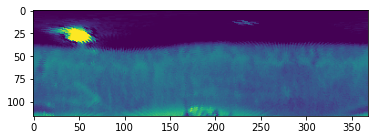

In [156]:
plt.imshow(polar)

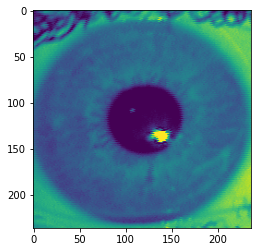

In [157]:
plt.imshow(tensor[0])